# Working with frequency data - An introduction

most natural and social phenomena have an element of periodicity - a tendency to repeat in semi-regular ways, whether human daily acticity levels, to climate behaviour, to the information contained in audio data. 

Before you can start to analyse the data, you need to be able to understand how to manipulate and visualise it. Today's short lesson will be looking at how we can represent whalesong visually, and if there are any trends that we use machine learning to extract.

This lesson is a dive into the deeper end of 

First, python cannot easily handle audio data and the more complex maths we want to carry out, so we need to call in some libraries to augment the functionality of the language

In [8]:
import pandas as pd  #This helps us contain our data in easy to handle Dataframes
import numpy as np # This provides additional mathematical support for handling our data
import matplotlib.pyplot as plt #This allows us to plot simple graphs
from scipy.io import wavfile #This allows us to handle .wav audio files

from scipy import signal #this lets us generate and plot spectrograms

%matplotlib notebook 
#This is a bit of jupyter magic that lets us interact with our plots in the notebook

Now that we've added all our needed libraries, let's pull in our audio file. Our wavfile module will tell us two things - the recording rate of our file, and the audio data itself, once we provide it with a path to our file.

In [3]:
recording_rate, audio_data = wavfile.read("./Data/Humpback whale song from Monterey Bay.wav")
audio_data.shape

(5297152, 2)

We can check our data with `.shape`, which tells is that we have 5297152 data points. But we have two of them, which means we have stereo data. As we don't need to worry about ahndling both streams independently, let's average them into a mono audio instead.

We need to specify that we want an average across the two channels - otherwise the `.mean` function would average down instead, leaving us with the average of the entire clip per channel - not very useful. 

We'll then check the shape again to see if it worked.

In [4]:
audio_data = np.mean(audio_data, axis = 1)
audio_data.shape

(5297152,)

Let's place this into a pandas Series (a one dimensional array of values) to make handling it easier down the line, and plot it to see what it looks like. We can take the time to properly set up our axes and labels, but right now we just want to visually verify the data we expect

<IPython.core.display.Javascript object>


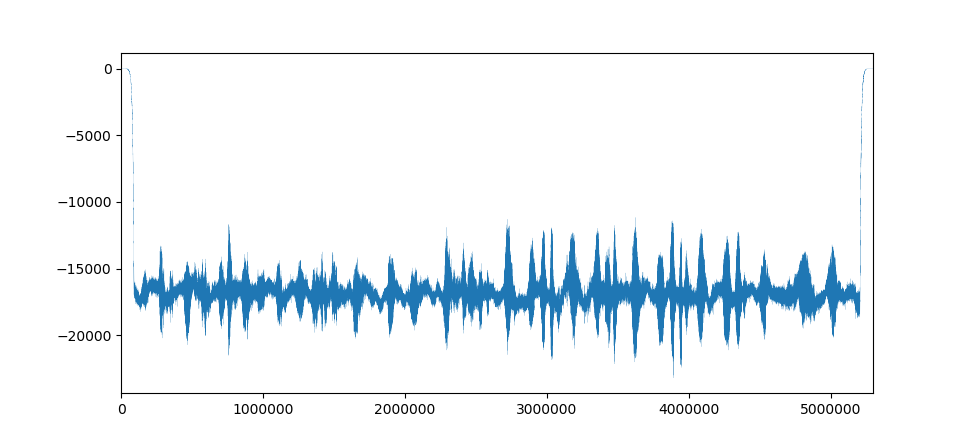

In [10]:
audio_data_series = pd.Series(audio_data)
audio_data_series.plot(lw = 0.1) #lw = line width


The data appears to be what we expect for an audiofile. There are high peaks at the beginning and the end, but this is just because of some padded silence at the beginning and end of the audio - nothing to worry about. If we want to analyse the data numerically later, we might want to clip away those areas, however.

### Power Spectrum

Now that we have the audio ready to go, we can start to visualise the frequency-domain information in the data. As humans, we don't percieve sound as a single fluctuating amplitude like in the plot above, but as a series of interlinked signals at different volumes and pitches - the higher the pitch, the higher the frequency of the sound. We can use a mathematical trick called kaiser transformation to flip the above graph around. Instead showing time across the x-axis and amplitude across the y-axis, we can show time across the x-axis, frequency across the y-axis, and then pixel intensity as amplitude.

We'll show this as discrete slices of time per analysis, all pushed together as a histogram-style representation of how the audio changes.

On a side note, we've chosen 1024 datapoints per slide as a tradeoff - too small a slice and we lose the lowest frequencies. Too high a window and we lose resolution. Finally, picking a $2^n$ number allows us to be mathematically efficient.

In [9]:
window_size = 1024

frequencies, times, amplitudes = signal.spectrogram(audio_data, fs = recording_rate, window='hanning', nperseg = window_size, \
                                               noverlap= window_size - 100, detrend= False, scaling="spectrum")

decibels = 20 * np.log10(amplitudes)
frequencies /= 1000

/home/users/lina3398/anaconda3/envs/non_deep_learning_ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


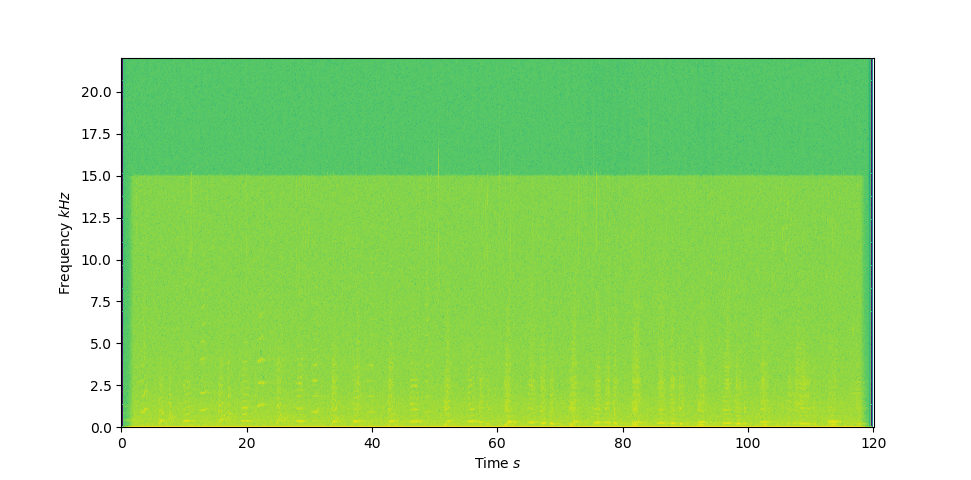

Text(0.5, 0, 'Time $s$')

In [10]:
f, ax = plt.subplots()
ax.pcolormesh(times, frequencies, decibels, cmap="viridis")
ax.set_ylabel("Frequency $kHz$")
ax.set_xlabel("Time $s$")